In [1]:
!pip install tensorflow opencv-python matplotlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import imghdr
import cv2
import matplotlib
from matplotlib import pyplot as plt

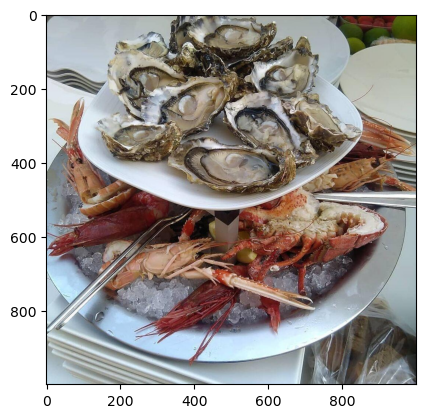

In [2]:
data_dir = 'data'
image_exts = ['jpeg']
os.listdir(os.path.join(data_dir, 'Food'))
img_food = cv2.imread(os.path.join('data', 'Food', '213415.jpg'))
plt.imshow(cv2.cvtColor(img_food,cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [4]:
import numpy as np

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1198 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [10]:
#changing classes to 1 or 0
batch[1]

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

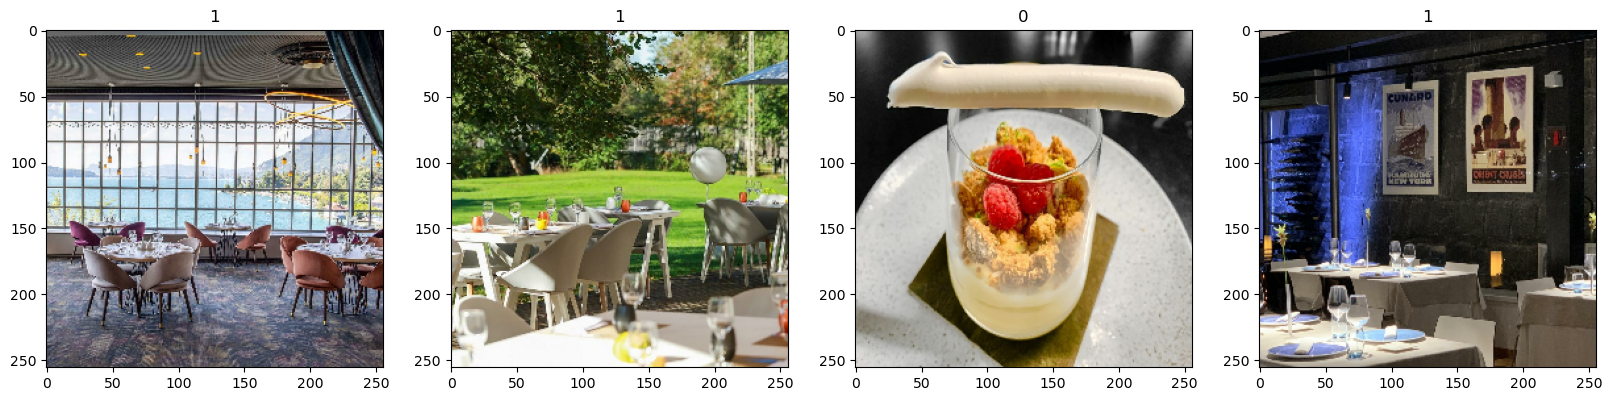

In [11]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#1 is interior, 0 is food

In [12]:
batch[0].max()

255.0

In [13]:
data = data.map(lambda x,y: (x/255, y))
#speeds up the process (smaller values)
#x is image, y is target variable

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

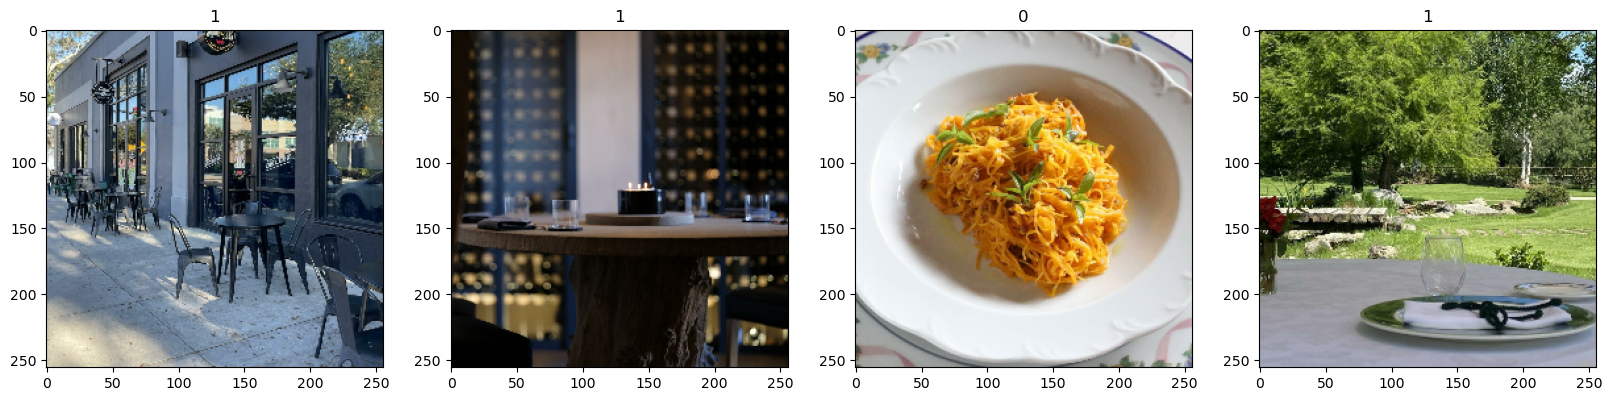

In [17]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [18]:
len(data)
#38 batches of 32 pictures

38

In [19]:
train_size = int(len(data)* .7) #to train the deep learning model
val_size = int(len(data)* .2) #to evaluate the model while we are training
test_size = int(len(data)* .1) #for final evaluation

In [20]:
#no overlap in batches
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Learning Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
#layers
#first a convolution with 16 filters (3x3 pixel size), with a stride of 1 (it moves 1 pixel at a time)
#these architectural decisions try to scan relevant information from picture
#relu function (changing everything below 0 to 0 and everything above remains unchanged)(sigmoid is another popular one)
#this is done to take non-linear patterns into account
#with 256x256 pixels each and 3 channels deep (color)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#flatten data
model.add(Flatten())

#add dense layers, 256 neurons
model.add(Dense(256, activation='relu'))

#final layer is a single dense layer, giving a single output
model.add(Dense(1, activation='sigmoid'))


In [24]:
#adam is an optimiser (a lot of optimisers)
#loss function
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [26]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-05-25 20:03:32.608619: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1198]
	 [[{{node Placeholder/_0}}]]
2023-05-25 20:03:32.608883: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1198]
	 [[{{node Placeholder/_4}}]]


26/26 [==============================] - ETA: 0s - loss: 0.7268 - accuracy: 0.6454

2023-05-25 20:03:39.617236: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1198]
	 [[{{node Placeholder/_4}}]]
2023-05-25 20:03:39.617390: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1198]
	 [[{{node Placeholder/_4}}]]


26/26 [==============================] - 10s 351ms/step - loss: 0.7268 - accuracy: 0.6454 - val_loss: 0.4932 - val_accuracy: 0.7768
Epoch 2/20
26/26 [==============================] - 9s 346ms/step - loss: 0.4541 - accuracy: 0.7969 - val_loss: 0.3977 - val_accuracy: 0.8482
Epoch 3/20
26/26 [==============================] - 10s 355ms/step - loss: 0.3905 - accuracy: 0.8305 - val_loss: 0.3882 - val_accuracy: 0.8571
Epoch 4/20
26/26 [==============================] - 10s 350ms/step - loss: 0.3281 - accuracy: 0.8606 - val_loss: 0.3008 - val_accuracy: 0.8750
Epoch 5/20
26/26 [==============================] - 10s 361ms/step - loss: 0.2777 - accuracy: 0.8846 - val_loss: 0.2740 - val_accuracy: 0.8929
Epoch 6/20
26/26 [==============================] - 10s 351ms/step - loss: 0.1997 - accuracy: 0.9243 - val_loss: 0.1903 - val_accuracy: 0.9286
Epoch 7/20
26/26 [==============================] - 10s 348ms/step - loss: 0.1394 - accuracy: 0.9519 - val_loss: 0.1974 - val_accuracy: 0.9286
Epoch 8/20


# Model Performance

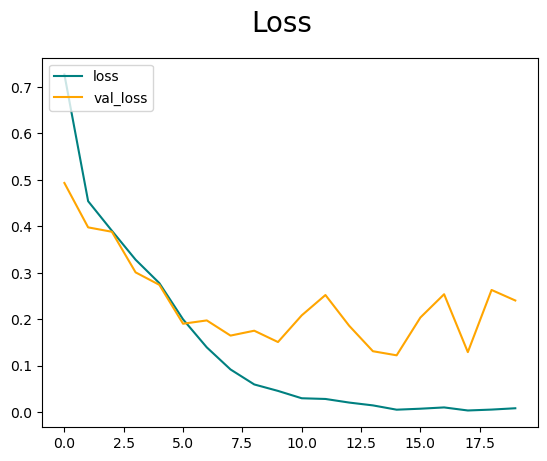

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

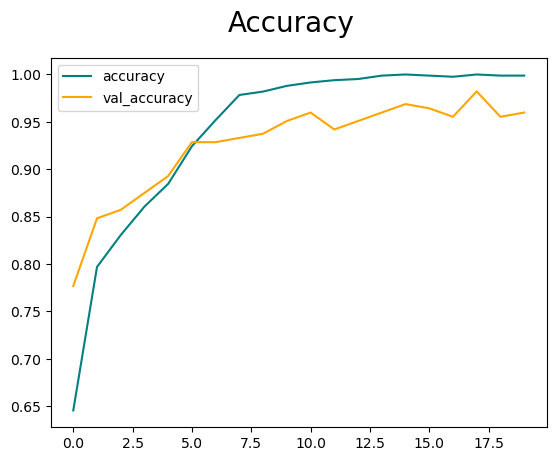

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-05-25 20:07:18.448701: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1198]
	 [[{{node Placeholder/_4}}]]
2023-05-25 20:07:18.449189: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1198]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 59ms/step


In [33]:
print(pre.result(), re.result(), acc.result())
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

tf.Tensor(0.9787234, shape=(), dtype=float32) tf.Tensor(0.9583333, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)
Precision:0.978723406791687, Recall:0.9583333134651184, Accuracy:0.96875


# Testing the Model

In [34]:
import cv2

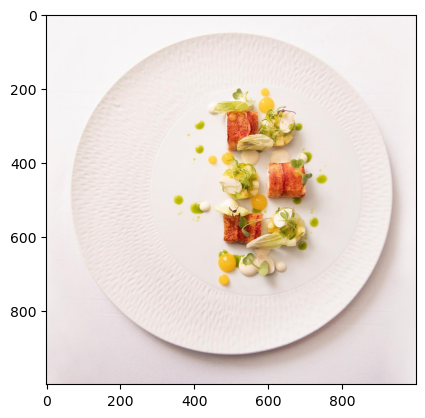

In [55]:
#a test image not used before
img = cv2.imread('foodtest3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

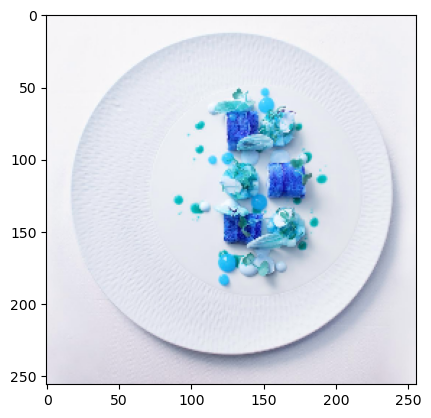

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 15ms/step


In [58]:
yhat
#1 is interior, 0 is food

array([[3.808186e-05]], dtype=float32)

In [59]:
if yhat > 0.5: 
    print(f'Predicted class is Interior')
else:
    print(f'Predicted class is Food')

Predicted class is Food


# Saving the Model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifier.h5'))
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

/Users/henricoorevits/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
new_model

In [44]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


array([[0.9992532]], dtype=float32)